# Analyse prédictive des perspectives économiques de l'OCDE

Source : https://data.oecd.org/fr/gdp/pib-trimestriel.htm

In [2]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import Traitement as tr
import os
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from Graph import Graph


## Structure de la donnée

In [3]:
#Lesture des données
data = pd.read_csv('./data/data.csv', sep=';')
print(data.iloc[100:105])
data

    LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME     Value  \
100      DEU      QGDP     TOT  PC_CHGPY         Q  1965-Q3  5.341683   
101      DEU      QGDP     TOT  PC_CHGPY         Q  1965-Q4  4.549873   
102      DEU      QGDP     TOT  PC_CHGPY         Q  1966-Q1  4.734370   
103      DEU      QGDP     TOT  PC_CHGPY         Q  1966-Q2  3.424304   
104      DEU      QGDP     TOT  PC_CHGPY         Q  1966-Q3  2.866220   

    Flag Codes  
100          E  
101          E  
102          E  
103          E  
104          E  


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,QGDP,TOT,PC_CHGPP,A,1962,5.696916,NaN
1,OECD,QGDP,TOT,PC_CHGPP,A,1963,5.175455,NaN
2,OECD,QGDP,TOT,PC_CHGPP,A,1964,6.361377,NaN
3,OECD,QGDP,TOT,PC_CHGPP,A,1965,5.364164,NaN
4,OECD,QGDP,TOT,PC_CHGPP,A,1966,5.733038,NaN
...,...,...,...,...,...,...,...,...
29229,EU27_2020,QGDP,TOT,PC_CHGPY,Q,2019-Q2,1.492475,NaN
29230,EU27_2020,QGDP,TOT,PC_CHGPY,Q,2019-Q3,1.636313,NaN
29231,EU27_2020,QGDP,TOT,PC_CHGPY,Q,2019-Q4,1.226753,NaN
29232,EU27_2020,QGDP,TOT,PC_CHGPY,Q,2020-Q1,-2.652716,NaN


- ### INDICATOR :
    - QGDP : Evolution du PIB par trimestre
 
- ### MEASURE :
	 - PC_CHGPP : Pourcentage de variation du PIB par rapport à la période précédente, uniquement disponible pour TOT
	 - PC_CHGPY : Pourcentage de variation du PIB par rapport à la même période, l'année précédente, uniquement disponible pour TOT. 
	 - IDX : indice de volume, uniquement disponible pour SUBJECT = VOLIDX

- ### SUBJECT:
	- TOT : Total
	- VOLIDX : Indice de volume

- ### FREQUENCY :
	- Q : Trimestre
	- A : Année

Lien d'un excel récapitulatif :
https://loicvieu-drive.mycozy.cloud/public?sharecode=JCVlMBO0XjQX


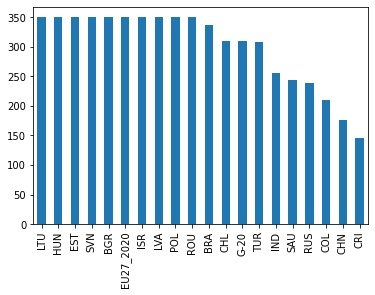

In [4]:
#Rapide visualisation pour voir qu'elle pays a le plus de data point
pays = pd.Series(data["LOCATION"].value_counts().head(20))
paysm =  pd.Series(data["LOCATION"].value_counts().tail(20))
image = paysm.plot(kind='bar')

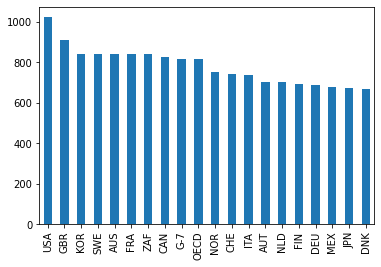

In [5]:
image = pays.plot(kind='bar')

Nous constatons que le nombre de points de données varie en fonction du pays, ce critère sera à prendre en compte pour la suite de nos analyses.

Dans un premier temps nous allons étudier les données de la France

# Analyse

La donnée que nous avons décidé d'exploiter représente les variations du PIB (en pourcentage) par rapport au précédent trimestre.
Ainsi nous pouvons uniquement déterminer l'évolution du PIB et non sa valeur à un temps donné.

## Etude des données

### Visualisation générale des données - Exemple de la France

In [6]:
a = tr.affichageMoyenneM(data, 'FRA', [4, 5] , 'Q')

In [7]:
g = Graph(data)

list_dates = g.get_list_dates_q(1964, 1975)#Dates pour lesquelles nous souhaitons afficher les données
df_fra = g.filter_df(['FRA', 'DEU', 'BEL', 'ESP', 'GBR'], 'Q', 'TOT', 'PC_CHGPP', list_dates)#Filtrage du df principal en fonction des éléments désirés

g.line_graph(df_fra, x='TIME', y='Value', x_label="Trimestre", y_label="Evolution du PIB (%)", title='Evolution du PIB au cours du temps - Mai 1968')#Création des courbes
g.display()

En temps normal, les fluctuations du PIB sont relativement faibles. Cependant, celui-ci peut être influencé par des évènements politiques, économiques, sanitaires majeurs.

Ce phénomène est facilement vérifiable en étudiant l'évolution du PIB aux dates d'évènements ayant marqué l'histoire.
Ainsi, en prenant l'exemple des évènements de Mai 1968, considérés comme les plus importants mouvements sociaux de l'histoire de France du XXe siècle nous remarquons une forte décroissance du PIB durant le 2e trimestre de 1968.

Nous pouvons vérifier la corrélation de cette décroissance en comparant l'évolution du PIB français avec celui d'autres nations voisines de la France.

Avec une décroissance de près de -7.6% pour la France et, dans le même temps, une croissance allant jusqu'à 3% pour des pays frontaliers de la France, la corrélation avec les manifestations et grèves de Mai 1968 ne laisse aucun doute.

In [8]:
list_dates = g.get_list_dates_q(2005, 2015)#Dates pour lesquelles nous souhaitons afficher les données
df_fra_usa = g.filter_df(['FRA', 'DEU', 'USA', 'JPN', 'GBR', 'ARG', 'BRA'], 'Q', 'TOT', 'PC_CHGPP', list_dates)#Filtrage du df principal en fonction des éléments désirés

g.line_graph(df_fra_usa, x='TIME', y='Value', x_label="Trimestre", y_label="Evolution du PIB (%)", title='Evolution du PIB au cours du temps - Crise des subprimes')#Création des courbes
g.display()

De même, nous pouvons constater l'impact mondial de la crise des subprimes aux Etats-Unis avec une décroissance générale du PIB à partir du premier trimestre de 2008 et qui atteignit son pic au premier trimestre de 2009.

In [9]:
list_dates = g.get_list_dates_q(2017, 2020)#Dates pour lesquelles nous souhaitons afficher les données
df_fra_usa = g.filter_df(['FRA', 'DEU', 'USA', 'JPN', 'GBR', 'ARG', 'BRA'], 'Q', 'TOT', 'PC_CHGPP', list_dates)#Filtrage du df principal en fonction des éléments désirés

g.line_graph(df_fra_usa, x='TIME', y='Value', x_label="Trimestre", y_label="Evolution du PIB (%)", title='Evolution du PIB au cours du temps - Crise économique Argentine')#Création des courbes
g.display()

Nous pouvons étudier un troisième exemple avec la crise économique connue par l'Argentine dont la monnaie nationale (peso argentin) a perdu 50% de sa valeur entre Janvier 2018 et Septembre 2018.

Avec une chute de la croissance du PIB de -5% au deuxième trimestre de 2018, l'impact de la crise est visible. Cependant, contrairement à la crise des subprimes de 2008, nous constatons que l'influence de cette crise n'est que nationale.

## Corrélation entre les données

Comme vu précédemment, l'influence des évènements peut être nationale ou internationale. En fonction des relations politiques et économiques entretenues entre les nations, nous pouvons déterminer la corrélation entre leurs croissances respectives du PIB.

Afin d'illustrer cette corrélation, nous choisirons différents pays dont la proximité politique et économique varie. 

In [10]:
dates = g.get_list_dates_q(1995, 2020)
g.display_correlation_heatmap(dates = dates, countries = ["FRA", "DEU", "ITA", "ESP", "GBR", "CAN", "USA", "JPN", "MEX", "ARG", "KOR", "CHN", "G-7"])

#dates = g.get_list_dates_q(1990, 2020)
#g.display_correlation_heatmap(dates = dates, countries = ["FRA", "DEU", "ITA", "ESP", "GBR", "CAN", "USA", "JPN", "MEX", "ARG", "KOR", "G-7"])

Pour la période de 1995 à 2019, comme attendu nous remarquons une forte corrélation entre les PIB de nations partageant une grande partie de leur marché. Le marché Europpéen se dinstingue très facilement, de même que les accords de libre échange entre nations comme c'est le cas entre le Canada et les Etats-Unis.

A l'inverse, entre des pays présentant de nombreuses divergences tels que les Etats-Unis et la Chine, la corrélation entre leurs PIB est faible.

Ainsi les difféntes politiques économiques internationales adoptées par les nations ont un impact sur le PIB des pays concernés.

In [11]:
# dates = g.get_list_dates_q(1995, 2020)

#df_corr = g.display_correlation_line(dates = dates, countries = ["G-7", "CHN"])
#g.line_graph(df_corr, x='TIME', y='Value', x_label="Année", y_label="Correlation entre les PIB", title='Evolution de la correlation entre les PIB')#Création des courbes
#g.display()

## Prédictions

### Corrélation période des données - Etude du cas de la France

In [12]:
dataFR = data[data['LOCATION'] == 'FRA']
gpy, gpp, ind = tr.traitementParPays(dataFR, 'A')
# tr.mobilMoy(gpp,4)

Les séries de données que nous étudions étant chronologiques, nous réalisons un graphique de retard afin d'observer une potentielle indcidence des données passées sur les données présentes.

Les graphiques de retard ci dessous nous montrent les relations entre les données en t / t+1 et t / t+2

#### Corrélation des données entre t et t+1

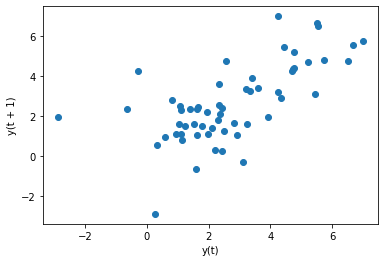

In [13]:
#Nous utilisons la méthode de pandas lag_plot pour les afficher.
#pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.lag_plot.html
lag_plot(gpp['Value'],lag=1)
plt.show()

#### Corrélation des donées entre t et t+2

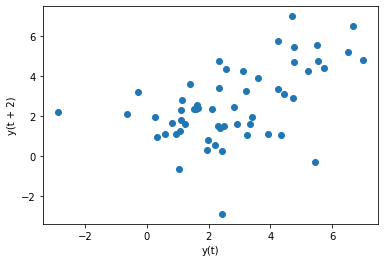

In [14]:
a = lag_plot(gpp['Value'],lag=2)
plt.show()

A vu d'oeil nous constatons que les données semblent être corrélées. Nous continuons notre analyse.
Nous calculons le coefficient de corrélation entre les données en t et en t+1

            t       t+1
t    1.000000  0.662071
t+1  0.662071  1.000000


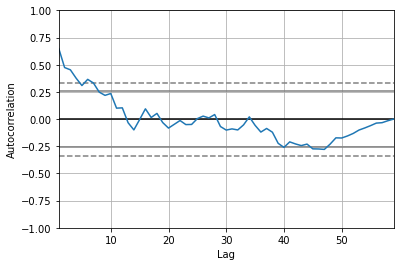

In [15]:
#Calcul corrélation de pearson
donnee = []
for µ in range(len(gpp['Value'])-1):
    donnee.append([gpp.iloc[µ]['Value'],gpp.iloc[µ+1]['Value']])
print(pd.DataFrame(donnee,columns=['t','t+1']).corr('pearson'))

#Par la suite nous pouvons faire le graphique d'auto-corr
autocorrelation_plot(gpp['Value'])
plt.show()

Nous avons un coefficient de corrélation de Pearson > 0,5, ce qui démontre une corrélation élévée pour un retard de 1

Nos données étant temporelles, nous allons tenter de déterminer si une composante saisonnière intervient.

In [16]:
#Nous récupérons les données de chaque années pour les 4 trimestres
dataTrim = tr.saisonier(dataFR)
#Nous affichons les statistique général
dataTrim.describe()

,ValeurQ1,ValeurQ2,ValeurQ3,ValeurQ4
count,59.000000,59.000000,59.000000,59.000000
mean,0.676929,0.577484,0.822542,0.586085
std,0.769279,1.350164,1.510368,0.627369
min,-1.665799,-7.580956,-0.312951,-1.510183
25%,0.263990,0.184265,0.286293,0.227723
50%,0.678052,0.631128,0.512995,0.653064
75%,1.033142,1.072126,0.944417,0.925338
max,2.909618,4.465475,11.373243,1.699022


#### Evolution des variations du PIB par trimestre

<AxesSubplot:>

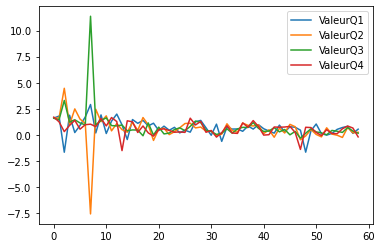

In [17]:
#nous réalisons un graphique
dataTrim.plot()

Sur le graphique nous ne constatons pas de composantes saisonnières.
Nous ponvons donc commencer l'estimation des modèles.

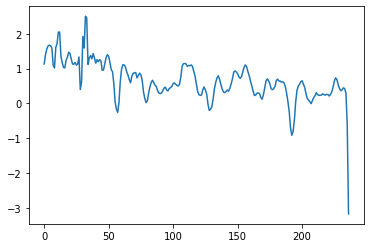

In [19]:
import pandas as pd
import matplotlib.pyplot  as plt
import Traitement as tr
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

#Nous récupérons les données pour la france
data = pd.read_csv('./data/data.csv', sep=';')
df_fra = data[data['LOCATION'] == "FRA"]
gpy, gpp, ind = tr.traitementParPays(df_fra, 'Q')
#Nous récupérons les valeurs des moyennes mobiles
data = pd.DataFrame(tr.mobilMoy(gpp,4)[0], columns=['id','date','valeur'])
data["valeur"].plot()
plt.show()

In [21]:
#Cette fonction réalise le test pour savoir si le modèle ARIMA est bon ou non, et nous retourne le modèle
def arima(data,p,d,q):
    X = data['valeur']
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    train = list(train)
    test = list(test)
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        # print('predicted=%f, expected=%f' % (yhat, obs))
    error = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    # return error
    return ARIMA(history, order=(p,d,q))

In [22]:
finF = 250
date = list(data['date'])
for i in range(237,finF+1):
    var =  date[-1].split('-')[1]
    if(var == 'Q1'):
        var = date[-1].split('-')[0] + '-Q2'
    elif(var == 'Q2'):
        var = date[-1].split('-')[0] + '-Q3'
    elif(var == 'Q3'):
        var = date[-1].split('-')[0] + '-Q4'
    elif(var == 'Q4'):
        var = str(int(date[-1].split('-')[0])+1) + '-Q1'
    date.append(var)

Test RMSE: 0.262


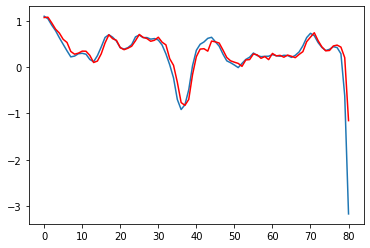

In [23]:
#ARIMA 6,1,1
test = arima(data,6,1,1)
start = len(data['valeur'])
model_fit = test.fit(disp=0)
# newPrediction = model_fit.predict(1,240)

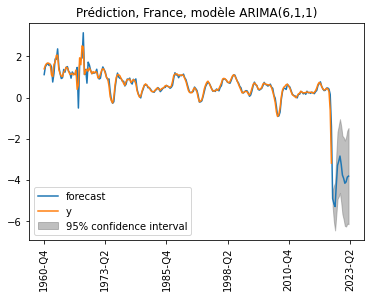

In [24]:
model_fit.plot_predict(1,finF)
date = [0,date[0],date[50],date[100],date[150],date[200],date[250]]
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(6,1,1)')
plt.show()

Test RMSE: 0.228


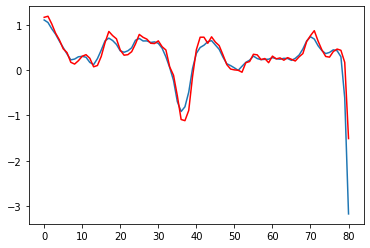

In [25]:
#AR 3 2 1 
test = arima(data,3,2,1)
model_fit2 = test.fit(disp=0)

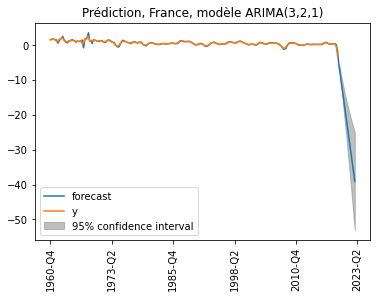

In [26]:
model_fit2.plot_predict(2,finF)
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(3,2,1)')
plt.show()

Test RMSE: 0.286


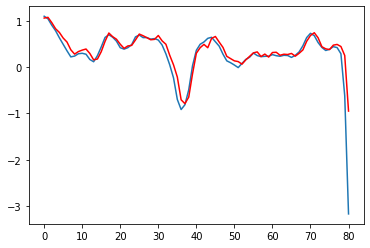

In [27]:
#AR 6
test = arima(data,6,0,0)
start = len(data['valeur'])
model_fit3 = test.fit(disp=0)

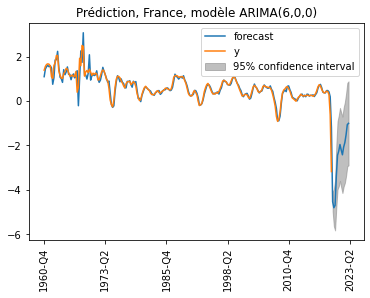

In [28]:
model_fit3.plot_predict(1,finF)
plt.gca().xaxis.set_ticklabels(date, rotation = 90)
plt.title('Prédiction, France, modèle ARIMA(6,0,0)')
plt.show()